Librerias

In [ ]:
# librerias para les redes neuronales convoluvionales 

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

# Librerias para arreglos multidimencionales 
import numpy as np

# Librerias para graficar 
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle
import itertools

# Librerias para obtener metricas 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc


Lectura y procesamiento 


In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Rutas de los conjuntos de imagenes 

ruta_ds_train = "/content/drive/My Drive/Entrenamiento/Train"
ruta_ds_test = "/content/drive/My Drive/Entrenamiento/Test"
num_classes = 3

In [ ]:
#preprocesamiento 

#Data Aaumentation 
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
#Load Data
train_generator = train_datagen.flow_from_directory(ruta_ds_train,target_size=(160,160),color_mode='rgb',class_mode='categorical',shuffle=True)
test_generator = test_datagen.flow_from_directory(ruta_ds_test,target_size=(160,160),color_mode='rgb',class_mode=None)

algunas_imagenes = next(test_generator)

Found 932 images belonging to 3 classes.
Found 302 images belonging to 3 classes.


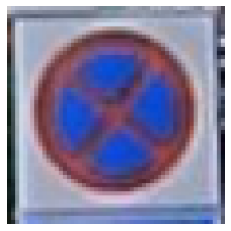

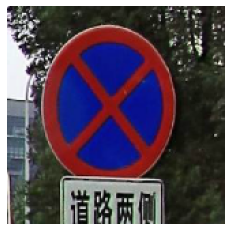

In [ ]:
plt.imshow(algunas_imagenes[0])
plt.axis('off')
plt.show()
plt.imshow(algunas_imagenes[1])
plt.axis('off')
plt.show()

Construccion y compilacion del modelo 

In [ ]:
# Desing

# Se define como un modelo secuencial 
model = Sequential()

# Se agregan las capas y su hiperparametros 

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(160, 160, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #80x80
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
# La capa de salida debe tener el mismo número de clases
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 160, 160, 32)      896       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 80, 80, 32)       0         
 g2D)                                                            
                                                                 
 dropout_42 (Dropout)        (None, 80, 80, 32)        0         
                                                                 
 conv2d_36 (Conv2D)          (None, 80, 80, 32)        9248      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 40, 40, 32)       0         
 g2D)                                                            
                                                                 
 dropout_43 (Dropout)        (None, 40, 40, 32)       

In [ ]:
# Compilacion del modelo 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.save('/content/drive/My Drive/Entrenamiento/model.h5')

Entrenamiento del modelo 


In [ ]:
# Entrenando - funciones y callbacks
callbacks = [EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5), ModelCheckpoint(filepath="/content/drive/My Drive/Entrenamiento/model.h5", monitor='val_loss', save_best_only=True, verbose=1,mode='min')]

step_size_train=train_generator.n/train_generator.batch_size
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=32, callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/32
30/29 [==============================] - ETA: 0s - loss: 0.9784 - accuracy: 0.5397WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 34s 1s/step - loss: 0.9784 - accuracy: 0.5397
Epoch 2/32
30/29 [==============================] - ETA: -1s - loss: 0.2877 - accuracy: 0.9045WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 34s 1s/step - loss: 0.2877 - accuracy: 0.9045
Epoch 3/32
30/29 [==============================] - ETA: -1s - loss: 0.0687 - accuracy: 0.9796WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 36s 1s/step - loss: 0.0687 - accuracy: 0.9796
Epoch 4/32
30/29 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9936WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 34s 1s/step - loss: 0.0182 - accuracy: 0.9936
Epoch 5/32
30/29 [==============================] - ETA: 0s - loss: 0.0236 - accuracy: 0.9925WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 34s 1s/step - loss: 0.0236 - accuracy: 0.9925
Epoch 6/32
30/29 [==============================] - ETA: -1s - loss: 0.0074 - accuracy: 0.9979WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 36s 1s/step - loss: 0.0074 - accuracy: 0.9979
Epoch 7/32
30/29 [==============================] - ETA: 0s - loss: 0.0067 - accuracy: 0.9979WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 34s 1s/step - loss: 0.0067 - accuracy: 0.9979
Epoch 8/32
30/29 [==============================] - ETA: 0s - loss: 0.0062 - accuracy: 0.9968WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 33s 1s/step - loss: 0.0062 - accuracy: 0.9968
Epoch 9/32
30/29 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 33s 1s/step - loss: 0.0020 - accuracy: 1.0000
Epoch 10/32
30/29 [==============================] - ETA: -1s - loss: 0.0083 - accuracy: 0.9979WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 36s 1s/step - loss: 0.0083 - accuracy: 0.9979
Epoch 11/32
30/29 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.9957WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 33s 1s/step - loss: 0.0113 - accuracy: 0.9957
Epoch 12/32
30/29 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 33s 1s/step - loss: 0.0026 - accuracy: 1.0000
Epoch 13/32
30/29 [==============================] - ETA: -1s - loss: 0.0013 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 35s 1s/step - loss: 0.0013 - accuracy: 1.0000
Epoch 14/32
30/29 [==============================] - ETA: 0s - loss: 3.1618e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 34s 1s/step - loss: 3.1618e-04 - accuracy: 1.0000
Epoch 15/32
30/29 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9979WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 33s 1s/step - loss: 0.0038 - accuracy: 0.9979
Epoch 16/32
30/29 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 34s 1s/step - loss: 0.0012 - accuracy: 1.0000
Epoch 17/32
30/29 [==============================] - ETA: 0s - loss: 1.1994e-05 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 34s 1s/step - loss: 1.1994e-05 - accuracy: 1.0000
Epoch 18/32
30/29 [==============================] - ETA: 0s - loss: 2.0551e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 34s 1s/step - loss: 2.0551e-04 - accuracy: 1.0000
Epoch 19/32
30/29 [==============================] - ETA: 0s - loss: 3.0059e-05 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 33s 1s/step - loss: 3.0059e-05 - accuracy: 1.0000
Epoch 20/32
30/29 [==============================] - ETA: -1s - loss: 8.7260e-05 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 35s 1s/step - loss: 8.7260e-05 - accuracy: 1.0000
Epoch 21/32
30/29 [==============================] - ETA: 0s - loss: 6.5463e-05 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 33s 1s/step - loss: 6.5463e-05 - accuracy: 1.0000
Epoch 22/32
30/29 [==============================] - ETA: 0s - loss: 5.0150e-05 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 34s 1s/step - loss: 5.0150e-05 - accuracy: 1.0000
Epoch 23/32
30/29 [==============================] - ETA: 0s - loss: 2.2524e-06 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 34s 1s/step - loss: 2.2524e-06 - accuracy: 1.0000
Epoch 24/32
30/29 [==============================] - ETA: 0s - loss: 6.9003e-06 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 35s 1s/step - loss: 6.9003e-06 - accuracy: 1.0000
Epoch 25/32
30/29 [==============================] - ETA: 0s - loss: 6.9721e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 34s 1s/step - loss: 6.9721e-04 - accuracy: 1.0000
Epoch 26/32
30/29 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 0.9903WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 33s 1s/step - loss: 0.0241 - accuracy: 0.9903
Epoch 27/32
30/29 [==============================] - ETA: -1s - loss: 0.0927 - accuracy: 0.9753WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 36s 1s/step - loss: 0.0927 - accuracy: 0.9753
Epoch 28/32
30/29 [==============================] - ETA: 0s - loss: 0.0292 - accuracy: 0.9914WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 33s 1s/step - loss: 0.0292 - accuracy: 0.9914
Epoch 29/32
30/29 [==============================] - ETA: 0s - loss: 0.0112 - accuracy: 0.9979WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 33s 1s/step - loss: 0.0112 - accuracy: 0.9979
Epoch 30/32
30/29 [==============================] - ETA: -1s - loss: 0.0051 - accuracy: 0.9989WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 35s 1s/step - loss: 0.0051 - accuracy: 0.9989
Epoch 31/32
30/29 [==============================] - ETA: 0s - loss: 7.7465e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 34s 1s/step - loss: 7.7465e-04 - accuracy: 1.0000
Epoch 32/32
30/29 [==============================] - ETA: 0s - loss: 4.8605e-04 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


29/29 [==============================] - 33s 1s/step - loss: 4.8605e-04 - accuracy: 1.0000


In [ ]:
ruta_prueba ="/content/drive/My Drive/Entrenamiento/Prueba"
prueba_datagen = ImageDataGenerator(rescale=1./255)
prueba_generator = prueba_datagen.flow_from_directory(ruta_prueba,target_size=(160,160),color_mode='rgb',class_mode=None)
algunas_imagenes = next(prueba_generator)



Found 5 images belonging to 1 classes.


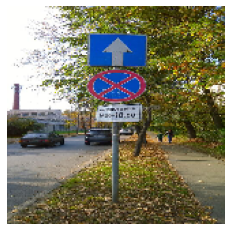

In [ ]:
plt.imshow(algunas_imagenes[0])
plt.axis('off')
plt.show()

In [ ]:
lote_test = next(prueba_generator)
probs = model.predict(lote_test)
clase = np.argmax(probs, -1)
print(probs)
print(clase)

[[1.2076946e-06 3.6560543e-04 9.9963319e-01]
 [3.7897941e-01 6.0759771e-01 1.3422923e-02]
 [9.2732370e-01 3.6413699e-02 3.6262605e-02]
 [9.4492060e-01 3.3324249e-02 2.1755189e-02]
 [1.9289113e-05 2.0230177e-04 9.9977845e-01]]
[2 1 0 0 2]


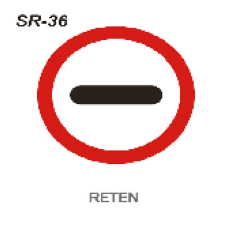

Prediccion:  tercera  clase:  tercera


KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


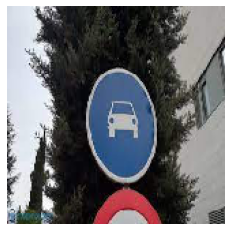

Prediccion:  Segunda  clase:  Segunda


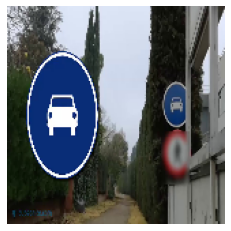

Prediccion:  Primera  clase:  Primera


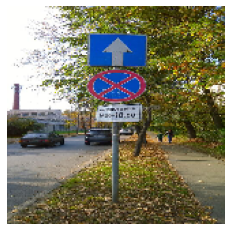

Prediccion:  Primera  clase:  Primera


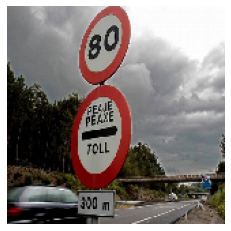

Prediccion:  tercera  clase:  tercera


In [124]:
mostrar_imagenes = 5

for i in range(mostrar_imagenes):
  plt.imshow(lote_test[i])
  plt.axis('off')
  plt.show()
  if clase[i] == 0:
    etiqueta = 'Primera'
  elif clase[i] == 1:
    etiqueta = 'Segunda'
  else:
    etiqueta = 'tercera'
  print("Prediccion: ", etiqueta, " clase: ", etiqueta)

Exportar modelo

In [125]:
# Guardando el modelo

model.save('/content/drive/My Drive/Entrenamiento/modelo.h5')

Graficas 


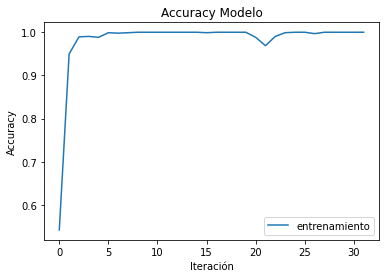

In [ ]:
# Grafica de la metrica de valores de precision 
plt.plot(history.history['accuracy'])
plt.title('Accuracy Modelo')
plt.ylabel('Accuracy')
plt.xlabel('Iteración')
plt.legend(['entrenamiento', 'validación'], loc='lower right')
plt.show()

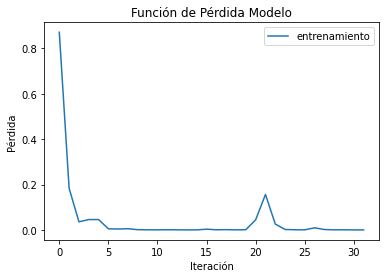

In [ ]:
# Gráfica de la función de pérdida
plt.plot(history.history['loss'])
plt.title('Función de Pérdida Modelo')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')
plt.legend(['entrenamiento', 'validación'], loc='upper right')
plt.show()